In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
df = pd.read_sas('./data/LLCP2021.XPT')

In [3]:
df_describe = False

In [4]:
# drop s0q1, interview state
# drop s0q8, file month
# drop s0q9, interview date
# drop s0q10, interview month
# drop s0q11, interview day
# drop s0q12, interview year
# drop s0q14, final disposition, can use for dropping partial interviews
# drop s0q15, annual sequence number
# drop s0q16, primary sampling unit

In [5]:
df = df[df.CTELENM1 != 2] # s0q1, dropping incorrect phone numbers

In [6]:
# drop s0q1, correct telephone number
# drop s0q2, private residence
# drop s0q3, college housing
# drop s0q4, resident of state
# drop s0q5, cellular telephone
# drop s0q6, 18 or older
# drop s0q7, college male or female
# drop s0q8, number af adults in household
# drop s0q9, landline sex
# drop s0q10, number of adult men in household
# drop s0q11, number of adult women in household
# drop s0q12, respondent selection
# drop s0q1, safe time to talk
# drop s0q2, correct phone number
# drop s0q3, is this a cell phone
# drop s0q4, 18 years or older cell phone
# drop s0q5, cell phone male or female
# drop s0q6, private residence cell phone
# drop s0q7, cell phone college housing
# drop s0q8, cell phone state confirmation
# drop s0q10, do you have a landline as well
# drop s0q11, number of adults in household

In [7]:
df = df.drop(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'DISPCODE', '_PSU', 'CTELENM1', 
                'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1','COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 
              'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5',
               'CADULT1','CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT'], axis=1)

In [8]:
pd.isna(df["SEXVAR"]).value_counts() # no nans

False    438691
Name: SEXVAR, dtype: int64

In [9]:
df = df[df['GENHLTH'] != 7]
df = df[df['GENHLTH'] != 9]

In [10]:
df['GENHLTH'] = df['GENHLTH'].replace(1,0)
df['GENHLTH'] = df['GENHLTH'].replace(2,1)
df['GENHLTH'] = df['GENHLTH'].replace(3,2)
df['GENHLTH'] = df['GENHLTH'].replace(4,3)
df['GENHLTH'] = df['GENHLTH'].replace(5,4)

In [11]:
df = df.dropna(subset=['GENHLTH'])

In [12]:
df["GENHLTH"].value_counts()

1.0    149110
2.0    137938
0.0     77741
3.0     54736
4.0     18005
Name: GENHLTH, dtype: int64

In [13]:
df['unk_PHYSHLTH'] = df['PHYSHLTH']
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(range(1,31), 0)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(88, 0)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(99, 1)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(77, 1)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].fillna(1)
df['unk_PHYSHLTH'].describe() if df_describe else ''

''

In [14]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88,0)
df['PHYSHLTH'] = df['PHYSHLTH'].replace(77,0)
df['PHYSHLTH'] = df['PHYSHLTH'].replace(99,0)
df['PHYSHLTH'] = df['PHYSHLTH'].fillna(0)
df['PHYSHLTH'].describe()

count    437530.000000
mean          3.706816
std           8.272157
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PHYSHLTH, dtype: float64

In [15]:
df['unk_MENTHLTH'] = df['MENTHLTH']
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(range(1,31), 0)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(88, 0)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(99, 1)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(77, 1)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].fillna(1)
df['unk_MENTHLTH'].describe() if df_describe else ''

''

In [16]:
df['MENTHLTH'] = df['MENTHLTH'].replace(88,0)
df['MENTHLTH'] = df['MENTHLTH'].replace(77,0)
df['MENTHLTH'] = df['MENTHLTH'].replace(99,0)
df['MENTHLTH'] = df['MENTHLTH'].fillna(0)
df['MENTHLTH'].describe() if df_describe else ''

''

In [17]:
df['unk_POORHLTH'] = df['POORHLTH']
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(range(1,31), 0)
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(88, 0)
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(99, 1)
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(77, 1)
df['unk_POORHLTH'] = df['unk_POORHLTH'].fillna(0)
df['unk_POORHLTH'].describe() if df_describe else ''

''

In [18]:
df['POORHLTH'] = df['POORHLTH'].replace(88,0)
df['POORHLTH'] = df['POORHLTH'].replace(77,0)
df['POORHLTH'] = df['POORHLTH'].replace(99,0)
df['POORHLTH'] = df['POORHLTH'].fillna(0)
df['POORHLTH'].describe() if df_describe else ''

''

In [19]:
# drop s3q1:PRIMINSR, health care access, _EDUCAG is a better metric
df = df.drop(['PRIMINSR'], axis=1)

In [20]:
df['unk_has_doc'] = df['PERSDOC3']
df['unk_has_doc'] = df['unk_has_doc'].replace([1,2,3],0)
df['unk_has_doc'] = df['unk_has_doc'].replace([7,9],1)
df['unk_has_doc'] = df['unk_has_doc'].fillna(1)
df['unk_has_doc'].describe() if df_describe else ''

''

In [21]:
# has a personal doctor
df['has_doc'] = df['PERSDOC3']
df.drop(columns=['PERSDOC3'])
df['has_doc'] = df['has_doc'].replace(2,1)
df['has_doc'] = df['has_doc'].replace(3,0)
df['has_doc'] = df['has_doc'].replace(7,0)
df['has_doc'] = df['has_doc'].replace(9,0)
df = df.dropna(subset=['has_doc'])
df['has_doc'].describe() if df_describe else ''

''

In [22]:
df['unk_MEDCOST1'] = df['MEDCOST1']
df['unk_MEDCOST1'] = df['unk_MEDCOST1'].replace([1,2],0)
df['unk_MEDCOST1'] = df['unk_MEDCOST1'].replace([7,9],1)
df['unk_MEDCOST1'] = df['unk_MEDCOST1'].fillna(1)
df['unk_MEDCOST1'].describe() if df_describe else ''

''

In [23]:
df['MEDCOST1'] = df['MEDCOST1'].replace(2,0)
df['MEDCOST1'] = df['MEDCOST1'].replace(7,0)
df['MEDCOST1'] = df['MEDCOST1'].replace(9,0)
df = df.dropna(subset=['MEDCOST1'])
df['MEDCOST1'].describe() if df_describe else ''

''

In [24]:
df['unk_past_year'] = df['CHECKUP1']
df['unk_past_year'] = df['unk_past_year'].replace([1,2,3,4,8],0)
df['unk_past_year'] = df['unk_past_year'].replace([7,9],1)
df['unk_past_year'] = df['unk_past_year'].fillna(1)
df['unk_past_year'].describe() if df_describe else ''

''

In [25]:
# within past year
df['past_year'] = df['CHECKUP1']
df.drop(columns=['CHECKUP1'])
df['past_year'] = df['past_year'].replace(2,0)
df['past_year'] = df['past_year'].replace(3,0)
df['past_year'] = df['past_year'].replace(4,0)
df['past_year'] = df['past_year'].replace(7,0)
df['past_year'] = df['past_year'].replace(8,0)
df['past_year'] = df['past_year'].replace(9,1)
df = df.dropna(subset=['past_year'])
df['past_year'].describe() if df_describe else ''

''

In [26]:
df['unk_EXERANY2'] = df['EXERANY2']
df['unk_EXERANY2'] = df['unk_EXERANY2'].replace([1,2],0)
df['unk_EXERANY2'] = df['unk_EXERANY2'].replace([7,9],1)
df['unk_EXERANY2'] = df['unk_EXERANY2'].fillna(1)
df['unk_EXERANY2'].describe() if df_describe else ''

''

In [27]:
# physical activity other than job
df = df.dropna(subset=['EXERANY2'])
df['EXERANY2'] = df['EXERANY2'].replace(2,0)
df = df[df['EXERANY2'] != 7]
df = df[df['EXERANY2'] != 9]
df['EXERANY2'].describe() if df_describe else ''

''

In [28]:
df['unk_high_blood_pressure'] = df['BPHIGH6']
df['unk_high_blood_pressure'] = df['unk_high_blood_pressure'].replace([1,2,3,4],0)
df['unk_high_blood_pressure'] = df['unk_high_blood_pressure'].replace([7,9],1)
df['unk_high_blood_pressure'] = df['unk_high_blood_pressure'].fillna(1)
df['unk_high_blood_pressure'].describe() if df_describe else ''

''

In [29]:
# high blood pressure
df['high_blood_pressure'] = df['BPHIGH6']
df['high_blood_pressure'] = df['high_blood_pressure'].replace(2,1)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(3,0)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(4,1)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(7,0)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(9,0)
df = df.dropna(subset=['high_blood_pressure'])
df['high_blood_pressure'].describe() if df_describe else ''

''

In [30]:
# pregnant high blood pressure
df['pregnant_high_blood_pressure'] = df['BPHIGH6']
df.drop(columns=['BPHIGH6'])
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(1,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(2,1)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(3,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(4,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(7,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(9,0)
df = df.dropna(subset=['pregnant_high_blood_pressure'])
df['pregnant_high_blood_pressure'].describe() if df_describe else ''

''

In [31]:
df['unk_BPMEDS'] = df['BPMEDS']
df['unk_BPMEDS'] = df['unk_BPMEDS'].replace([1,2],0)
df['unk_BPMEDS'] = df['unk_BPMEDS'].replace([7,9],1)
df['unk_BPMEDS'] = df['unk_BPMEDS'].fillna(0)
df['unk_BPMEDS'].describe() if df_describe else ''

''

In [32]:
# high blood pressure medication
df['BPMEDS'] = df['BPMEDS'].replace(2,0)
df['BPMEDS'] = df['BPMEDS'].replace(7,0)
df['BPMEDS'] = df['BPMEDS'].replace(9,0)
df['BPMEDS'] = df['BPMEDS'].fillna(0)
df['BPMEDS'].describe() if df_describe else ''

''

In [33]:
df['unk_CHOLCHK3'] = df['CHOLCHK3']
df['unk_CHOLCHK3'] = df['unk_CHOLCHK3'].replace([1,2,3,4,5,6,8],0)
df['unk_CHOLCHK3'] = df['unk_CHOLCHK3'].replace([7,9],1)
df['unk_CHOLCHK3'] = df['unk_CHOLCHK3'].fillna(1)
df['unk_CHOLCHK3'].describe() if df_describe else ''

''

In [34]:
# cholesterol checked within last year
df['CHOLCHK3'] = df['CHOLCHK3'].replace(1,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(2,1)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(3,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(4,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(5,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(6,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(7,1)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(8,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(9,1)
df = df.dropna(subset=['CHOLCHK3'])
df['CHOLCHK3'].describe() if df_describe else ''

''

In [35]:
df['unk_TOLDHI3'] = df['TOLDHI3']
df['unk_TOLDHI3'] = df['unk_TOLDHI3'].replace([1,2],0)
df['unk_TOLDHI3'] = df['unk_TOLDHI3'].replace([7,9],1)
df['unk_TOLDHI3'] = df['unk_TOLDHI3'].fillna(0)
df['unk_TOLDHI3'].describe() if df_describe else ''

''

In [36]:
df['not_known_TOLDHI3'] = df['TOLDHI3']
df['not_known_TOLDHI3'] = df['not_known_TOLDHI3'].replace([1,2,7,9],0)
df['not_known_TOLDHI3'] = df['not_known_TOLDHI3'].fillna(1)
df['not_known_TOLDHI3'].describe() if df_describe else ''

''

In [37]:
# been told cholesterol is high
df['TOLDHI3'] = df['TOLDHI3'].replace([2,7,9],0)
df['TOLDHI3'] = df['TOLDHI3'].fillna(0)
df['TOLDHI3'].describe() if df_describe else ''

''

In [38]:
df['unk_CHOLMED3'] = df['CHOLMED3']
df['unk_CHOLMED3'] = df['unk_CHOLMED3'].replace([1,2],0)
df['unk_CHOLMED3'] = df['unk_CHOLMED3'].replace([7,9],1)
df['unk_CHOLMED3'] = df['unk_CHOLMED3'].fillna(0)
df['unk_CHOLMED3'].describe() if df_describe else ''

''

In [39]:
# taking medicine prescribed by doctor
df['CHOLMED3'] = df['CHOLMED3'].replace([2,7],0)
df['CHOLMED3'] = df['CHOLMED3'].replace(9,1)
df['CHOLMED3'] = df['CHOLMED3'].fillna(0)
df['CHOLMED3'].describe() if df_describe else ''

''

In [40]:
df['unk_CVDINFR4'] = df['CVDINFR4']
df['unk_CVDINFR4'] = df['unk_CVDINFR4'].replace([1,2],0)
df['unk_CVDINFR4'] = df['unk_CVDINFR4'].replace([7,9],1)
df['unk_CVDINFR4'] = df['unk_CVDINFR4'].fillna(1)
df['unk_CVDINFR4'].describe() if df_describe else ''

''

In [41]:
# *had heart attack*
df['CVDINFR4'] = df['CVDINFR4'].replace([2,7,9],0)
df['CVDINFR4'] = df['CVDINFR4'].fillna(0)
df['CVDINFR4'].describe() if df_describe else ''

''

In [42]:
df['unk_CVDCRHD4'] = df['CVDCRHD4']
df['unk_CVDCRHD4'] = df['unk_CVDCRHD4'].replace([1,2],0)
df['unk_CVDCRHD4'] = df['unk_CVDCRHD4'].replace([7,9],1)
df['unk_CVDCRHD4'] = df['unk_CVDCRHD4'].fillna(1)
df['unk_CVDCRHD4'].describe() if df_describe else ''

''

In [43]:
# *told had angina or coronary heart disease*
df['CVDINFR4'] = df['CVDINFR4'].replace([2,7,9],0)
df['CVDINFR4'] = df['CVDINFR4'].fillna(0)
df['CVDINFR4'].describe() if df_describe else ''

''

In [44]:
df['unk_CVDSTRK3'] = df['CVDSTRK3']
df['unk_CVDSTRK3'] = df['unk_CVDSTRK3'].replace([1,2],0)
df['unk_CVDSTRK3'] = df['unk_CVDSTRK3'].replace([7,9],1)
df['unk_CVDSTRK3'] = df['unk_CVDSTRK3'].fillna(1)
df['unk_CVDSTRK3'].describe() if df_describe else ''

''

In [45]:
# *had stroke*
df['CVDSTRK3'] = df['CVDSTRK3'].replace([2,7,9],0)
df['CVDSTRK3'] = df['CVDSTRK3'].fillna(0)
df['CVDSTRK3'].describe() if df_describe else ''

''

In [46]:
df['unk_ASTHMA3'] = df['ASTHMA3']
df['unk_ASTHMA3'] = df['unk_ASTHMA3'].replace([1,2],0)
df['unk_ASTHMA3'] = df['unk_ASTHMA3'].replace([7,9],1)
df['unk_ASTHMA3'] = df['unk_ASTHMA3'].fillna(1)
df['unk_ASTHMA3'].describe() if df_describe else ''

''

In [47]:
# *had asthma*
df['ASTHMA3'] = df['ASTHMA3'].replace([2,7,9],0)
df['ASTHMA3'] = df['ASTHMA3'].fillna(0)
df['ASTHMA3'].describe() if df_describe else ''

''

In [48]:
df['unk_ASTHNOW'] = df['ASTHNOW']
df['unk_ASTHNOW'] = df['unk_ASTHNOW'].replace([1,2],0)
df['unk_ASTHNOW'] = df['unk_ASTHNOW'].replace([7,9],1)
df['unk_ASTHNOW'] = df['unk_ASTHNOW'].fillna(0)
df['unk_ASTHNOW'].describe() if df_describe else ''

''

In [49]:
# *has asthma now*
df['ASTHNOW'] = df['ASTHNOW'].replace([2,7,9],0)
df['ASTHNOW'] = df['ASTHNOW'].fillna(0)
df['ASTHNOW'].describe() if df_describe else ''

''

In [50]:
df['unk_CHCSCNCR'] = df['CHCSCNCR']
df['unk_CHCSCNCR'] = df['unk_CHCSCNCR'].replace([1,2],0)
df['unk_CHCSCNCR'] = df['unk_CHCSCNCR'].replace([7,9],1)
df['unk_CHCSCNCR'] = df['unk_CHCSCNCR'].fillna(1)
df['unk_CHCSCNCR'].describe() if df_describe else ''

''

In [51]:
# *had skin cancer*
df['CHCSCNCR'] = df['CHCSCNCR'].replace([2,7,9],0)
df['CHCSCNCR'] = df['CHCSCNCR'].fillna(0)
df['CHCSCNCR'].describe() if df_describe else ''

''

In [52]:
df['unk_CHCOCNCR'] = df['CHCOCNCR']
df['unk_CHCOCNCR'] = df['unk_CHCOCNCR'].replace([1,2],0)
df['unk_CHCOCNCR'] = df['unk_CHCOCNCR'].replace([7,9],1)
df['unk_CHCOCNCR'] = df['unk_CHCOCNCR'].fillna(1)
df['unk_CHCOCNCR'].describe() if df_describe else ''

''

In [53]:
# *had other cancer*
df['CHCOCNCR'] = df['CHCOCNCR'].replace([2,7,9],0)
df['CHCOCNCR'] = df['CHCOCNCR'].fillna(0)
df['CHCOCNCR'].describe() if df_describe else ''

''

In [54]:
df['unk_CHCCOPD3'] = df['CHCCOPD3']
df['unk_CHCCOPD3'] = df['unk_CHCCOPD3'].replace([1,2],0)
df['unk_CHCCOPD3'] = df['unk_CHCCOPD3'].replace([7,9],1)
df['unk_CHCCOPD3'] = df['unk_CHCCOPD3'].fillna(1)
df['unk_CHCCOPD3'].describe() if df_describe else ''

''

In [55]:
# *had other cancer*
df['CHCCOPD3'] = df['CHCCOPD3'].replace([2,7,9],0)
df['CHCCOPD3'] = df['CHCCOPD3'].fillna(0)
df['CHCCOPD3'].describe() if df_describe else ''

''

In [56]:
df['unk_ADDEPEV3'] = df['ADDEPEV3']
df['unk_ADDEPEV3'] = df['unk_ADDEPEV3'].replace([1,2],0)
df['unk_ADDEPEV3'] = df['unk_ADDEPEV3'].replace([7,9],1)
df['unk_ADDEPEV3'] = df['unk_ADDEPEV3'].fillna(1)
df['unk_ADDEPEV3'].describe() if df_describe else ''

''

In [57]:
# *had depressive disorder*
df['ADDEPEV3'] = df['ADDEPEV3'].replace([2,7,9],0)
df['ADDEPEV3'] = df['ADDEPEV3'].fillna(0)
df['ADDEPEV3'].describe() if df_describe else ''

''

In [58]:
df['unk_CHCKDNY2'] = df['CHCKDNY2']
df['unk_CHCKDNY2'] = df['unk_CHCKDNY2'].replace([1,2],0)
df['unk_CHCKDNY2'] = df['unk_CHCKDNY2'].replace([7,9],1)
df['unk_CHCKDNY2'] = df['unk_CHCKDNY2'].fillna(1)
df['unk_CHCKDNY2'].describe() if df_describe else ''

''

In [59]:
# *had kidney disease*
df['ADDEPEV3'] = df['ADDEPEV3'].replace([2,7,9],0)
df['ADDEPEV3'] = df['ADDEPEV3'].fillna(0)
df['ADDEPEV3'].describe() if df_describe else ''

''

In [60]:
# target variable, 0: no diabetes reported, prediabetes or only during pregnancy, 1: diabetes
df['diabetes'] = df['DIABETE4']
df['diabetes'] = df['diabetes'].replace([2,3,4,7,9],0)
df['diabetes'] = df['diabetes'].replace([1],1)
df['diabetes'] = df['diabetes'].fillna(0)
df['diabetes'].describe() if df_describe else ''

''

In [61]:
# *had diabetes during pregnancy*
# df['pregnancy_diabetes'] = df['DIABETE4']
# df['pregnancy_diabetes'] = df['pregnancy_diabetes'].replace([1,3,4,7,9],0)
# df['pregnancy_diabetes'] = df['pregnancy_diabetes'].replace(2,1)
# df['pregnancy_diabetes'] = df['pregnancy_diabetes'].fillna(0)
# df['pregnancy_diabetes'].describe() if df_describe else ''

In [62]:
# *had prediabetes*
# df['pre_diabetes'] = df['DIABETE4']
# df['pre_diabetes'] = df['pre_diabetes'].replace([1,2,3,7,9],0)
# df['pre_diabetes'] = df['pre_diabetes'].replace(4,1)
# df['pre_diabetes'] = df['pre_diabetes'].fillna(0)
# df['pre_diabetes'].describe() if df_describe else ''

In [63]:
# *had diabetes*
# df['DIABETE4'] = df['DIABETE4'].replace(2,1)
# df['DIABETE4'] = df['DIABETE4'].replace([3,4,7,9],0)
# df['DIABETE4'] = df['DIABETE4'].fillna(0)
# df['DIABETE4'].describe() if df_describe else ''

In [64]:
# drop s7q12, old when told had diabetes, not relevant for diagnosing
df = df.drop(['DIABAGE3'], axis=1)

In [65]:
df['unk_HAVARTH5'] = df['HAVARTH5']
df['unk_HAVARTH5'] = df['unk_HAVARTH5'].replace([1,2],0)
df['unk_HAVARTH5'] = df['unk_HAVARTH5'].replace([7,9],1)
df['unk_HAVARTH5'] = df['unk_HAVARTH5'].fillna(1)
df['unk_HAVARTH5'].describe() if df_describe else ''

''

In [66]:
# *have arthritis
df['HAVARTH5'] = df['HAVARTH5'].replace([2,7,9],0)
df['HAVARTH5'] = df['HAVARTH5'].fillna(0)
df['HAVARTH5'].describe() if df_describe else ''

''

In [67]:
# drop s8q2, suggested physical activity for arthritis, not relevant for diagnosis
# drop s8q3, taken course for arthritis, not relevant for diagnosis
# drop s8q4, limited because of joint symptoms, not relevant for diagnosis
# drop s8q5, arthritis affects work, not relevant for diagnosis
df = df.drop(['ARTHEXER', 'ARTHEDU', 'LMTJOIN3', 'ARTHDIS2'], axis=1)

In [68]:
#df['unk_LMTJOIN3'] = df['LMTJOIN3']
#df['unk_LMTJOIN3'] = df['unk_LMTJOIN3'].replace([1,2],0)
#df['unk_LMTJOIN3'] = df['unk_LMTJOIN3'].replace([7,9],1)
#df['unk_LMTJOIN3'] = df['unk_LMTJOIN3'].fillna(0)
#df['unk_LMTJOIN3'].describe() if df_describe else ''

In [69]:
# limited by their arthritis or joints
#df['LMTJOIN3'] = df['LMTJOIN3'].replace([2,7,9],0)
#df['LMTJOIN3'] = df['LMTJOIN3'].fillna(0)
#df['LMTJOIN3'].describe() if df_describe else ''

In [70]:
#df['unk_ARTHDIS2'] = df['ARTHDIS2']
#df['unk_ARTHDIS2'] = df['unk_ARTHDIS2'].replace([1,2],0)
#df['unk_ARTHDIS2'] = df['unk_ARTHDIS2'].replace([7,9],1)
#df['unk_ARTHDIS2'] = df['unk_ARTHDIS2'].fillna(0)
#df['unk_ARTHDIS2'].describe() if df_describe else ''

In [71]:
# arthritis or joints affects work
#df['ARTHDIS2'] = df['ARTHDIS2'].replace([2,7,9],0)
#df['ARTHDIS2'] = df['ARTHDIS2'].fillna(0)
#df['ARTHDIS2'].describe() if df_describe else ''

In [72]:
df['unk_JOINPAI2'] = df['JOINPAI2']
df['unk_JOINPAI2'] = df['unk_JOINPAI2'].replace(range(0,11),0)
df['unk_JOINPAI2'] = df['unk_JOINPAI2'].replace([77,99],1)
df['unk_JOINPAI2'] = df['unk_JOINPAI2'].fillna(0)
df['unk_JOINPAI2'].describe() if df_describe else ''

''

In [73]:
# how bad was joint pain
df['JOINPAI2'] = df['JOINPAI2'].replace([77,99],1)
df['JOINPAI2'] = df['JOINPAI2'].fillna(0)
df['JOINPAI2'].describe() if df_describe else ''

''

In [74]:
df['unk_MARITAL'] = df['MARITAL']
df['unk_MARITAL'] = df['unk_MARITAL'].replace(range(1,7),0)
df['unk_MARITAL'] = df['unk_MARITAL'].replace(9,1)
df['unk_MARITAL'] = df['unk_MARITAL'].fillna(1)
df['unk_MARITAL'].describe() if df_describe else ''

''

In [75]:
# married
df['married'] = df['MARITAL']
df['married'] = df['married'].replace([2,3,4,5,6,9],0)
df['married'] = df['married'].fillna(0)
df['married'].describe() if df_describe else ''

''

In [76]:
# divorced
df['divorced'] = df['MARITAL']
df['divorced'] = df['divorced'].replace([1,3,4,5,6,9],0)
df['divorced'] = df['divorced'].replace(2,1)
df['divorced'] = df['divorced'].fillna(0)
df['divorced'].describe() if df_describe else ''

''

In [77]:
# widowed
df['widowed'] = df['MARITAL']
df['widowed'] = df['widowed'].replace([1,2,4,5,6,9],0)
df['widowed'] = df['widowed'].replace(3,1)
df['widowed'] = df['widowed'].fillna(0)
df['widowed'].describe() if df_describe else ''

''

In [78]:
# Separated
df['separated'] = df['MARITAL']
df['separated'] = df['separated'].replace([1,2,3,5,6,9],0)
df['separated'] = df['separated'].replace(4,1)
df['separated'] = df['separated'].fillna(0)
df['separated'].describe() if df_describe else ''

''

In [79]:
# never married
df['never_married'] = df['MARITAL']
df['never_married'] = df['never_married'].replace([1,2,3,4,6,9],0)
df['never_married'] = df['never_married'].replace(5,1)
df['never_married'] = df['never_married'].fillna(0)
df['never_married'].describe() if df_describe else ''

''

In [80]:
# unmarried_couple
df['unmarried_couple'] = df['MARITAL']
df['unmarried_couple'] = df['unmarried_couple'].replace([1,2,3,4,5,9],0)
df['unmarried_couple'] = df['unmarried_couple'].replace(6,1)
df['unmarried_couple'] = df['unmarried_couple'].fillna(0)
df['unmarried_couple'].describe() if df_describe else ''

''

In [81]:
# drop s9q6, education level, _EDUCAG is better
df = df.drop(['EDUCA'], axis=1)

In [82]:
df['unk_RENTHOM1'] = df['RENTHOM1']
df['unk_RENTHOM1'] = df['unk_RENTHOM1'].replace([1,2,3],0)
df['unk_RENTHOM1'] = df['unk_RENTHOM1'].replace([7,9],1)
df['unk_RENTHOM1'] = df['unk_RENTHOM1'].fillna(1)
df['unk_RENTHOM1'].describe() if df_describe else ''

''

In [83]:
# own
df['own_house'] = df['RENTHOM1']
df['own_house'] = df['own_house'].replace([2,3,7,9],0)
df['own_house'] = df['own_house'].fillna(0)
df['own_house'].describe() if df_describe else ''

''

In [84]:
# rent
df['RENTHOM1'] = df['RENTHOM1'].replace([1,3,7,9],0)
df['RENTHOM1'] = df['RENTHOM1'].replace(2,1)
df['RENTHOM1'] = df['RENTHOM1'].fillna(0)
df['RENTHOM1'].describe() if df_describe else ''

''

In [85]:
# drop s9q10, household telephones, not relevant
# drop s9q11, residential phones
# drop s9q12, cell phone for personal use
df = df.drop(['NUMHHOL3', 'NUMPHON3', 'CPDEMO1B'], axis=1)

In [86]:
df['unk_VETERAN3'] = df['VETERAN3']
df['unk_VETERAN3'] = df['unk_VETERAN3'].replace([1,2],0)
df['unk_VETERAN3'] = df['unk_VETERAN3'].replace([7,9],1)
df['unk_VETERAN3'] = df['unk_VETERAN3'].fillna(1)
df['unk_VETERAN3'].describe() if df_describe else ''

''

In [87]:
# rent
df['VETERAN3'] = df['VETERAN3'].replace([2,7,9],0)
df['VETERAN3'] = df['VETERAN3'].fillna(0)
df['VETERAN3'].describe() if df_describe else ''

''

In [88]:
df['unk_EMPLOY1'] = df['EMPLOY1']
df['unk_EMPLOY1'] = df['unk_EMPLOY1'].replace(range(1,9),0)
df['unk_EMPLOY1'] = df['unk_EMPLOY1'].replace(9,1)
df['unk_EMPLOY1'] = df['unk_EMPLOY1'].fillna(1)
df['unk_EMPLOY1'].describe() if df_describe else ''

''

In [89]:
# employed for wages
df['employed_for_wages'] = df['EMPLOY1']
df['employed_for_wages'] = df['employed_for_wages'].replace(range(2,10),0)
df['employed_for_wages'] = df['employed_for_wages'].fillna(0)
df['employed_for_wages'].describe() if df_describe else ''

''

In [90]:
# self employed
df['self_employed'] = df['EMPLOY1']
df['self_employed'] = df['self_employed'].replace([1,3,4,5,6,7,8,9],0)
df['self_employed'] = df['self_employed'].replace(2,1)
df['self_employed'] = df['self_employed'].fillna(0)
df['self_employed'].describe() if df_describe else ''

''

In [91]:
# Out of work for 1 year or more
df['out_of_work_year_plus'] = df['EMPLOY1']
df['out_of_work_year_plus'] = df['out_of_work_year_plus'].replace([1,2,4,5,6,7,8,9],0)
df['out_of_work_year_plus'] = df['out_of_work_year_plus'].replace(3,1)
df['out_of_work_year_plus'] = df['out_of_work_year_plus'].fillna(0)
df['out_of_work_year_plus'].describe() if df_describe else ''

''

In [92]:
# Out of work for less than 1 year
df['out_of_work_year_less'] = df['EMPLOY1']
df['out_of_work_year_less'] = df['out_of_work_year_less'].replace([1,2,3,5,6,7,8,9],0)
df['out_of_work_year_less'] = df['out_of_work_year_less'].replace(4,1)
df['out_of_work_year_less'] = df['out_of_work_year_less'].fillna(0)
df['out_of_work_year_less'].describe() if df_describe else ''

''

In [93]:
# homemaker
df['homemaker'] = df['EMPLOY1']
df['homemaker'] = df['homemaker'].replace([1,2,3,4,6,7,8,9],0)
df['homemaker'] = df['homemaker'].replace(5,1)
df['homemaker'] = df['homemaker'].fillna(0)
df['homemaker'].describe() if df_describe else ''

''

In [94]:
# a student
df['student'] = df['EMPLOY1']
df['student'] = df['student'].replace([1,2,3,4,5,7,8,9],0)
df['student'] = df['student'].replace(6,1)
df['student'] = df['student'].fillna(0)
df['student'].describe() if df_describe else ''

''

In [95]:
# retired
df['retired'] = df['EMPLOY1']
df['retired'] = df['retired'].replace([1,2,3,4,5,6,8,9],0)
df['retired'] = df['retired'].replace(7,1)
df['retired'] = df['retired'].fillna(0)
df['retired'].describe() if df_describe else ''

''

In [96]:
# unable to work
df['unable_to_work'] = df['EMPLOY1']
df['unable_to_work'] = df['unable_to_work'].replace([1,2,3,4,5,6,7,9],0)
df['unable_to_work'] = df['unable_to_work'].replace(8,1)
df['unable_to_work'] = df['unable_to_work'].fillna(0)
df['unable_to_work'].describe() if df_describe else ''

''

In [97]:
df = df.drop(['EMPLOY1'], axis=1)

In [98]:
# drop s9q15, number of children in household, not relevant
# drop s9q16, income level, _INCOMG1 is a better metric
df = df.drop(['CHILDREN', 'INCOME3'], axis=1)

In [99]:
df['unk_PREGNANT'] = df['PREGNANT']
df['unk_PREGNANT'] = df['unk_PREGNANT'].replace([1,2],0)
df['unk_PREGNANT'] = df['unk_PREGNANT'].replace([7,9],1)
df['unk_PREGNANT'] = df['unk_PREGNANT'].fillna(0)
df['unk_PREGNANT'].describe() if df_describe else ''

''

In [100]:
# pregnant
df['PREGNANT'] = df['PREGNANT'].replace([2,7,9],0)
df['PREGNANT'] = df['PREGNANT'].fillna(0)
df['PREGNANT'].describe() if df_describe else ''

''

In [101]:
# drop s9q18, reported weight pounds, WTKG3 is a better metric
# drop s9q19, reported height in feet and inches, HTM4 is a better metric
df = df.drop(['WEIGHT2', 'HEIGHT3'], axis=1)

In [102]:
df['unk_DEAF'] = df['DEAF']
df['unk_DEAF'] = df['unk_DEAF'].replace([1,2],0)
df['unk_DEAF'] = df['unk_DEAF'].replace([7,9],1)
df['unk_DEAF'] = df['unk_DEAF'].fillna(1)
df['unk_DEAF'].describe() if df_describe else ''

''

In [103]:
# *is deaf*
df['DEAF'] = df['DEAF'].replace([2,7,9],0)
df['DEAF'] = df['DEAF'].fillna(0)
df['DEAF'].describe() if df_describe else ''

''

In [104]:
df['unk_BLIND'] = df['BLIND']
df['unk_BLIND'] = df['unk_BLIND'].replace([1,2],0)
df['unk_BLIND'] = df['unk_BLIND'].replace([7,9],1)
df['unk_BLIND'] = df['unk_BLIND'].fillna(1)
df['unk_BLIND'].describe() if df_describe else ''

''

In [105]:
# *is blind*
df['BLIND'] = df['BLIND'].replace([2,7,9],0)
df['BLIND'] = df['BLIND'].fillna(0)
df['BLIND'].describe() if df_describe else ''

''

In [106]:
df['unk_DECIDE'] = df['DECIDE']
df['unk_DECIDE'] = df['unk_DECIDE'].replace([1,2],0)
df['unk_DECIDE'] = df['unk_DECIDE'].replace([7,9],1)
df['unk_DECIDE'] = df['unk_DECIDE'].fillna(1)
df['unk_DECIDE'].describe() if df_describe else ''

''

In [107]:
# difficulty concentrating or remembering
df['DECIDE'] = df['DECIDE'].replace([2,7,9],0)
df['DECIDE'] = df['DECIDE'].fillna(0)
df['DECIDE'].describe() if df_describe else ''

''

In [108]:
df['unk_DIFFWALK'] = df['DIFFWALK']
df['unk_DIFFWALK'] = df['unk_DIFFWALK'].replace([1,2],0)
df['unk_DIFFWALK'] = df['unk_DIFFWALK'].replace([7,9],1)
df['unk_DIFFWALK'] = df['unk_DIFFWALK'].fillna(1)
df['unk_DIFFWALK'].describe() if df_describe else ''

''

In [109]:
# Difficulty Walking or Climbing Stairs
df['DIFFWALK'] = df['DIFFWALK'].replace([2,7,9],0)
df['DIFFWALK'] = df['DIFFWALK'].fillna(0)
df['DIFFWALK'].describe() if df_describe else ''

''

In [110]:
df['unk_DIFFDRES'] = df['DIFFDRES']
df['unk_DIFFDRES'] = df['unk_DIFFDRES'].replace([1,2],0)
df['unk_DIFFDRES'] = df['unk_DIFFDRES'].replace([7,9],1)
df['unk_DIFFDRES'] = df['unk_DIFFDRES'].fillna(1)
df['unk_DIFFDRES'].describe() if df_describe else ''

''

In [111]:
# Difficulty Dressing or Bathing
df['DIFFDRES'] = df['DIFFDRES'].replace([2,7,9],0)
df['DIFFDRES'] = df['DIFFDRES'].fillna(0)
df['DIFFDRES'].describe() if df_describe else ''

''

In [112]:
df['unk_DIFFALON'] = df['DIFFALON']
df['unk_DIFFALON'] = df['unk_DIFFALON'].replace([1,2],0)
df['unk_DIFFALON'] = df['unk_DIFFALON'].replace([7,9],1)
df['unk_DIFFALON'] = df['unk_DIFFALON'].fillna(1)
df['unk_DIFFALON'].describe() if df_describe else ''

''

In [113]:
# Difficulty Doing Errands Alone
df['DIFFALON'] = df['DIFFALON'].replace([2,7,9],0)
df['DIFFALON'] = df['DIFFALON'].fillna(0)
df['DIFFALON'].describe() if df_describe else ''

''

In [114]:
df['unk_SMOKE100'] = df['SMOKE100']
df['unk_SMOKE100'] = df['unk_SMOKE100'].replace([1,2],0)
df['unk_SMOKE100'] = df['unk_SMOKE100'].replace([7,9],1)
df['unk_SMOKE100'] = df['unk_SMOKE100'].fillna(1)
df['unk_SMOKE100'].describe() if df_describe else ''

''

In [115]:
# Smoked at Least 100 Cigarettes
df['SMOKE100'] = df['SMOKE100'].replace([2,7,9],0)
df['SMOKE100'] = df['SMOKE100'].fillna(0)
df['SMOKE100'].describe() if df_describe else ''

''

In [116]:
df['unk_SMOKDAY2'] = df['SMOKDAY2']
df['unk_SMOKDAY2'] = df['unk_SMOKDAY2'].replace([1,2,3],0)
df['unk_SMOKDAY2'] = df['unk_SMOKDAY2'].replace([7,9],1)
df['unk_SMOKDAY2'] = df['unk_SMOKDAY2'].fillna(0)
df['unk_SMOKDAY2'].describe() if df_describe else ''

''

In [117]:
# smoke every day
df['smoke_every_day'] = df['SMOKDAY2']
df['smoke_every_day'] = df['smoke_every_day'].replace([2,3,7,9],0)
df['smoke_every_day'] = df['smoke_every_day'].fillna(0)
df['smoke_every_day'].describe() if df_describe else ''

''

In [118]:
# smoke some days
df['smoke_some_days'] = df['SMOKDAY2']
df['smoke_some_days'] = df['smoke_some_days'].replace([1,3,7,9],0)
df['smoke_some_days'] = df['smoke_some_days'].replace(2,1)
df['smoke_some_days'] = df['smoke_some_days'].fillna(0)
df['smoke_some_days'].describe() if df_describe else ''

''

In [119]:
# smokes not at all
df['smoke_not_at_all'] = df['SMOKDAY2']
df['smoke_not_at_all'] = df['smoke_not_at_all'].replace([1,2,7,9],0)
df['smoke_not_at_all'] = df['smoke_not_at_all'].replace(3,1)
df['smoke_not_at_all'] = df['smoke_not_at_all'].fillna(0)
df['smoke_not_at_all'].describe() if df_describe else ''

''

In [120]:
df = df.drop(['SMOKDAY2'], axis=1)

In [121]:
df['unk_USENOW3'] = df['USENOW3']
df['unk_USENOW3'] = df['unk_USENOW3'].replace([1,2,3],0)
df['unk_USENOW3'] = df['unk_USENOW3'].replace([7,9],1)
df['unk_USENOW3'] = df['unk_USENOW3'].fillna(1)
df['unk_USENOW3'].describe() if df_describe else ''

''

In [122]:
# smokeless every day
df['smokeless_every_day'] = df['USENOW3']
df['smokeless_every_day'] = df['smokeless_every_day'].replace([2,3,7,9],0)
df['smokeless_every_day'] = df['smokeless_every_day'].fillna(0)
df['smokeless_every_day'].describe() if df_describe else ''

''

In [123]:
# smokeless some days
df['smokeless_some_days'] = df['USENOW3']
df['smokeless_some_days'] = df['smokeless_some_days'].replace([1,3,7,9],0)
df['smokeless_some_days'] = df['smokeless_some_days'].replace(2,1)
df['smokeless_some_days'] = df['smokeless_some_days'].fillna(0)
df['smokeless_some_days'].describe() if df_describe else ''

''

In [124]:
# smokeless not at all
df['smokeless_not_at_all'] = df['USENOW3']
df['smokeless_not_at_all'] = df['smokeless_not_at_all'].replace([1,2,7,9],0)
df['smokeless_not_at_all'] = df['smokeless_not_at_all'].replace(3,1)
df['smokeless_not_at_all'] = df['smokeless_not_at_all'].fillna(0)
df['smokeless_not_at_all'].describe() if df_describe else ''

''

In [125]:
df = df.drop(['USENOW3'], axis=1)

In [126]:
df['unk_ECIGNOW1'] = df['ECIGNOW1']
df['unk_ECIGNOW1'] = df['unk_ECIGNOW1'].replace([1,2,3,4],0)
df['unk_ECIGNOW1'] = df['unk_ECIGNOW1'].replace([7,9],1)
df['unk_ECIGNOW1'] = df['unk_ECIGNOW1'].fillna(1)
df['unk_ECIGNOW1'].describe() if df_describe else ''

''

In [127]:
# ecig every day
df['ecig_every_day'] = df['ECIGNOW1']
df['ecig_every_day'] = df['ecig_every_day'].replace([2,3,4,7,9],0)
df['ecig_every_day'] = df['ecig_every_day'].fillna(0)
df['ecig_every_day'].describe() if df_describe else ''

''

In [128]:
# ecig some days
df['ecig_some_days'] = df['ECIGNOW1']
df['ecig_some_days'] = df['ecig_some_days'].replace([1,3,4,7,9],0)
df['ecig_some_days'] = df['ecig_some_days'].replace(2,1)
df['ecig_some_days'] = df['ecig_some_days'].fillna(0)
df['ecig_some_days'].describe() if df_describe else ''

''

In [129]:
# ecig not at all
df['ecig_not_at_all'] = df['ECIGNOW1']
df['ecig_not_at_all'] = df['ecig_not_at_all'].replace([1,2,4,7,9],0)
df['ecig_not_at_all'] = df['ecig_not_at_all'].replace(3,1)
df['ecig_not_at_all'] = df['ecig_not_at_all'].fillna(0)
df['ecig_not_at_all'].describe() if df_describe else ''

''

In [130]:
# ecig never used
df['ecig_never_used'] = df['ECIGNOW1']
df['ecig_never_used'] = df['ecig_never_used'].replace([1,2,3,7,9],0)
df['ecig_never_used'] = df['ecig_never_used'].replace(4,1)
df['ecig_never_used'] = df['ecig_never_used'].fillna(0)
df['ecig_never_used'].describe() if df_describe else ''

''

In [131]:
df = df.drop(['ECIGNOW1'], axis=1)

In [132]:
df['unk_ALCDAY5'] = df['ALCDAY5']
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].replace(range(101,231),0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].replace(888,0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].replace([777,999],1)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(1)
df['unk_ALCDAY5'].describe() if df_describe else ''

''

In [133]:
# Days in past 30 had alcoholic beverage
df.loc[df['ALCDAY5'] < 110, 'ALCDAY5'] = (df.loc[df['ALCDAY5'] < 110, 'ALCDAY5']-100)*4
df.loc[(df['ALCDAY5'] < 231)&(df['ALCDAY5'] > 199), 'ALCDAY5'] -= 200
df['ALCDAY5'] = df['ALCDAY5'].replace([777,888,999],0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(0)
df['ALCDAY5'].describe()

count    412366.000000
mean          4.737163
std           8.036508
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max          30.000000
Name: ALCDAY5, dtype: float64

In [134]:
df['AVEDRNK3'].describe()

count    209842.000000
mean          4.190972
std          12.725171
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          99.000000
Name: AVEDRNK3, dtype: float64

In [135]:
df['unk_AVEDRNK3'] = df['AVEDRNK3']
df['unk_AVEDRNK3'].replace(range(1,77),0, inplace=True)
df['unk_AVEDRNK3'].replace(88,0, inplace = True)
df['unk_AVEDRNK3'].replace([77,99],1, inplace = True)
df['unk_AVEDRNK3'].fillna(0, inplace = True)
df['unk_AVEDRNK3'].describe()

count    436654.000000
mean          0.008123
std           0.089762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_AVEDRNK3, dtype: float64

In [136]:
# binge drinking
df['AVEDRNK3'].replace([88,77,99], 0, inplace=True)
df['AVEDRNK3'].fillna(0, inplace=True)
df['AVEDRNK3'].describe()

count    436654.000000
mean          1.054173
std           2.010715
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          76.000000
Name: AVEDRNK3, dtype: float64

In [137]:
df['unk_MAXDRNKS'] = df['MAXDRNKS']
df['unk_MAXDRNKS'].replace(range(1,77),0, inplace=True)
df['unk_MAXDRNKS'].replace([77,99],1, inplace = True)
df['unk_MAXDRNKS'].fillna(0, inplace = True)
df['unk_MAXDRNKS'].describe()

count    436654.00000
mean          0.01692
std           0.12897
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: unk_MAXDRNKS, dtype: float64

In [138]:
# max drinks on a single occassion
df['MAXDRNKS'].replace([77,99], 0, inplace=True)
df['MAXDRNKS'].fillna(0, inplace=True)
df['MAXDRNKS'].describe()

count    436654.000000
mean          1.515580
std           2.820448
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          76.000000
Name: MAXDRNKS, dtype: float64

In [139]:
df['unk_FLUSHOT7'] = df['FLUSHOT7']
df['unk_FLUSHOT7'].replace([1,2],0, inplace=True)
df['unk_FLUSHOT7'].replace([7,9],1, inplace = True)
df['unk_FLUSHOT7'].fillna(1, inplace = True)
df['unk_FLUSHOT7'].describe()

count    436654.000000
mean          0.071068
std           0.256938
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_FLUSHOT7, dtype: float64

In [140]:
# adult flu shot/spray past 12 months
df['FLUSHOT7'].replace([2,7,9], 0, inplace=True)
df['FLUSHOT7'].fillna(0, inplace=True)
df['FLUSHOT7'].describe()

count    436654.000000
mean          0.484104
std           0.499748
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLUSHOT7, dtype: float64

In [141]:
df['unk_FLSHTMY3'] = df['FLSHTMY3']
# this line crashes the PC
#df['unk_FLSHTMY3'].replace(range(12020,122022),0, inplace=True)
df.loc[df.unk_FLSHTMY3 >= 2020, 'unk_FLSHTMY3'] = 0
df['unk_FLSHTMY3'].replace([777777,999999],1, inplace = True)
df['unk_FLSHTMY3'].fillna(0, inplace = True)
df['unk_FLSHTMY3'].describe()

count    436654.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: unk_FLSHTMY3, dtype: float64

In [142]:
df['FLSHTMY3'].value_counts()

102020.0    58562
92020.0     24979
102021.0    24048
112020.0    23883
777777.0    16455
92021.0     11964
112021.0    10050
122020.0     7553
12021.0      6349
22021.0      5324
32021.0      4746
82020.0      3328
42021.0      2835
122021.0     2652
82021.0      2000
52021.0      1584
62021.0      1032
72021.0       735
999999.0      585
72020.0       417
62020.0       398
32020.0       356
42020.0       239
52020.0       236
22020.0       216
12022.0       203
12020.0        87
772020.0       24
772021.0        8
2020.0          5
22022.0         4
112019.0        1
122019.0        1
Name: FLSHTMY3, dtype: int64

In [143]:
# during what month did you recieve your most recent flu vaccine
df['FLSHTMY3'].replace([777777,999999], 0, inplace=True)
df['FLSHTMY3'].fillna(0, inplace=True)

df['FLSHTMY3'].value_counts()
for ind in df.index:
    v = (df['FLSHTMY3'][ind] % 10000)
    if v >= 2019:
        v=v-2019
    v = v*12
    v = v + math.floor(df['FLSHTMY3'][ind]/10000)
    df['FLSHTMY3'][ind] = v

df['FLSHTMY3'].value_counts()

0.0      242835
22.0      58562
21.0      24979
34.0      24048
23.0      23883
33.0      11964
35.0      10050
24.0       7553
25.0       6349
26.0       5324
27.0       4746
20.0       3328
28.0       2835
36.0       2652
32.0       2000
29.0       1584
30.0       1032
31.0        735
19.0        417
18.0        398
15.0        356
16.0        239
17.0        236
14.0        216
37.0        203
13.0         87
89.0         24
101.0         8
12.0          6
38.0          4
11.0          1
Name: FLSHTMY3, dtype: int64

In [144]:
df['FLSHTMY3'].describe()

count    436654.000000
mean         11.407636
std          13.261740
min           0.000000
25%           0.000000
50%           0.000000
75%          22.000000
max         101.000000
Name: FLSHTMY3, dtype: float64

In [145]:
# drop s13q3, not relevant for diagnosis
df = df.drop(['IMFVPLA2'], axis=1)

In [146]:
df['unk_PNEUVAC4'] = df['PNEUVAC4']
df['unk_PNEUVAC4'].replace([1,2],0, inplace=True)
df['unk_PNEUVAC4'].replace([7,9],1, inplace = True)
df['unk_PNEUVAC4'].fillna(1, inplace = True)
df['unk_PNEUVAC4'].describe()

count    436654.000000
mean          0.142667
std           0.349733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_PNEUVAC4, dtype: float64

In [147]:
# adult flu shot/spray past 12 months
df['PNEUVAC4'].replace([2,7,9], 0, inplace=True)
df['PNEUVAC4'].fillna(0, inplace=True)
df['PNEUVAC4'].describe()

count    436654.000000
mean          0.345468
std           0.475521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: PNEUVAC4, dtype: float64

In [148]:
df['unk_HIVTST7'] = df['HIVTST7']
df['unk_HIVTST7'].replace([1,2],0, inplace=True)
df['unk_HIVTST7'].replace([7,9],1, inplace = True)
df['unk_HIVTST7'].fillna(1, inplace = True)
df['unk_HIVTST7'].describe()

count    436654.000000
mean          0.117626
std           0.322165
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_HIVTST7, dtype: float64

In [149]:
# Ever tested for HIV
df['HIVTST7'].replace([2,7,9], 0, inplace=True)
df['HIVTST7'].fillna(0, inplace=True)
df['HIVTST7'].describe()

count    436654.000000
mean          0.294336
std           0.455744
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HIVTST7, dtype: float64

In [150]:
# drop HIVTSTD3 s14q2, makes the model vulnerable to differences in time taking test
df = df.drop(['HIVTSTD3'], axis=1)

In [151]:
df['FRUTDA2_'].describe()

count    3.932420e+05
mean     1.341240e+02
std      5.003509e+02
min      5.397605e-79
25%      4.300000e+01
50%      1.000000e+02
75%      1.000000e+02
max      9.900000e+03
Name: FRUTDA2_, dtype: float64

(array([155605., 144543.,   1862.,  59603.,  21193.,    345.,   3989.,
          2217.]),
 array([  0. ,  62.5, 125. , 187.5, 250. , 312.5, 375. , 437.5, 500. ]),
 <BarContainer object of 8 artists>)

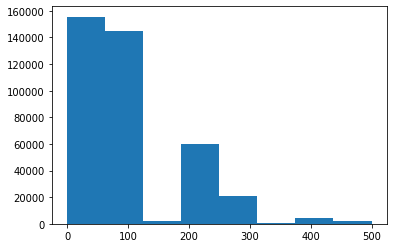

In [152]:
plt.hist(df['FRUTDA2_'], range=[0,500], bins=8)

(array([26556., 23145.,  9512., 27752.,  5502., 37056.,  5063., 21027.,
        21069.,   155.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

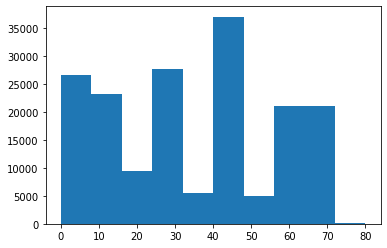

In [153]:
plt.hist(df['FRUTDA2_'], range=[0,80], bins=10)

In [154]:
df['unk_FRUIT2'] = df['FRUIT2']
df['unk_FRUIT2'] = df['unk_FRUIT2'].replace(range(101,400),0)
df['unk_FRUIT2'] = df['unk_FRUIT2'].replace(555,0)
df['unk_FRUIT2'] = df['unk_FRUIT2'].replace([777,999],1)
df['unk_FRUIT2'] = df['unk_FRUIT2'].fillna(1)
df['unk_FRUIT2'].describe()

count    436654.000000
mean          0.099420
std           0.299225
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_FRUIT2, dtype: float64

In [155]:
# Days in past 30 had alcoholic beverage
df.loc[df['ALCDAY5'] < 110, 'ALCDAY5'] = (df.loc[df['ALCDAY5'] < 110, 'ALCDAY5']-100)*4
df.loc[(df['ALCDAY5'] < 231)&(df['ALCDAY5'] > 199), 'ALCDAY5'] -= 200
df['ALCDAY5'] = df['ALCDAY5'].replace([777,888,999],0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(0)
df['ALCDAY5'].describe()

count    412366.000000
mean       -381.051348
std          32.146032
min        -400.000000
25%        -400.000000
50%        -396.000000
75%        -380.000000
max        -280.000000
Name: ALCDAY5, dtype: float64

In [156]:
# Not including juices, how often did you eat fruit?
df.loc[df['ALCDAY5'] < 110, 'ALCDAY5'] = (df.loc[df['ALCDAY5'] < 110, 'ALCDAY5']-100)*4
df.loc[(df['ALCDAY5'] < 231)&(df['ALCDAY5'] > 199), 'ALCDAY5'] -= 200
df['ALCDAY5'] = df['ALCDAY5'].replace([777,888,999],0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(0)
df['ALCDAY5'].describe()

count    412366.000000
mean      -1924.205390
std         128.584128
min       -2000.000000
25%       -2000.000000
50%       -1984.000000
75%       -1920.000000
max       -1520.000000
Name: ALCDAY5, dtype: float64

In [157]:
df[['FRUIT2','FRUTDA2_','_FRUTSU1']].head(10)

,FRUIT2,FRUTDA2_,_FRUTSU1
0,101.0,100.0,100.0
1,101.0,100.0,100.0
2,101.0,100.0,100.0
3,203.0,43.0,114.0
4,101.0,100.0,100.0
5,202.0,29.0,29.0
6,312.0,40.0,43.0
7,204.0,57.0,57.0
8,202.0,29.0,129.0
9,101.0,100.0,100.0


In [158]:
df.loc[(df['FRUIT2'] < 300)&(df['FRUIT2'] > 199)][['FRUIT2','FRUTDA2_']].head(10)

,FRUIT2,FRUTDA2_
3,203.0,43.0
5,202.0,29.0
7,204.0,57.0
8,202.0,29.0
10,203.0,43.0
11,205.0,71.0
13,203.0,43.0
19,202.0,29.0
20,204.0,57.0
25,202.0,29.0


|1|2|3|4|5|6|7|
|-|-|-|-|-|-|-|
|0.14|0.29|0.43|0.57|0.71|0.86|1|
Its (number of times a week)/7 to calculate fruit intake per day

In [159]:
df.loc[df['FRUIT2'] == 300][['FRUIT2','FRUTDA2_']].head(10)

,FRUIT2,FRUTDA2_
50,300.0,2.0
81,300.0,2.0
381,300.0,2.0
423,300.0,2.0
432,300.0,2.0
444,300.0,2.0
670,300.0,2.0
713,300.0,2.0
728,300.0,2.0
790,300.0,2.0


In [160]:
# drop FRUIT2 s15q1, in favor of FRUTDA2_ instead
# drop FRUITJU2 s15q2, in favor of FTJUDA2_ instead
# drop FVGREEN1 s15q3, in favor of GRENDA1_ instead
# drop FRENCHF1 s15q4, in favor of FRNCHDA_ instead
# drop POTATOE1 s15q5, in favor of POTADA1_ instead
# drop VEGETAB2 s15q6, in favor of VEGEDA2_ instead
df = df.drop(['FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2'], axis=1)

In [161]:
df['unk_PDIABTST'] = df['PDIABTST']
df['unk_PDIABTST'].replace([1,2],0, inplace=True)
df['unk_PDIABTST'].replace([7,9],1, inplace = True)
df['unk_PDIABTST'].fillna(0, inplace = True)
df['unk_PDIABTST'].describe()

count    436654.000000
mean          0.012589
std           0.111492
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_PDIABTST, dtype: float64

In [162]:
# Had a test for high blood sugar or diabetes in the past three years?
df['PDIABTST'].replace([2,7,9], 0, inplace=True)
df['PDIABTST'].fillna(0, inplace=True)
df['PDIABTST'].describe()

count    436654.000000
mean          0.142255
std           0.349311
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: PDIABTST, dtype: float64

In [163]:
# drop PREDIAB1 m1q2, not relevant for diagnosis
df = df.drop(['PREDIAB1'], axis=1)

In [164]:
df['unk_INSULIN1'] = df['INSULIN1']
df['unk_INSULIN1'].replace([1,2],0, inplace=True)
df['unk_INSULIN1'].replace([7,9],1, inplace = True)
df['unk_INSULIN1'].fillna(0, inplace = True)
df['unk_INSULIN1'].describe()

count    436654.000000
mean          0.000149
std           0.012200
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_INSULIN1, dtype: float64

In [165]:
# Are you now taking insulin?
df['INSULIN1'].replace([2,7,9], 0, inplace=True)
df['INSULIN1'].fillna(0, inplace=True)
df['INSULIN1'].describe()

count    436654.000000
mean          0.016709
std           0.128179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: INSULIN1, dtype: float64

In [166]:
# save df as csv here for model training, remove later

# df.to_csv(r'.\data\clean_data.csv')

In [167]:
# drop BLDSUGAR m2q2, introduces bias
# drop FEETCHK3 m2q3, introduces bias
# drop DOCTDIAB m2q4, already confirmed diabetes
# drop CHKHEMO3 m2q5, already confirmed diabetes
# drop FEETCHK m2q6, already confirmed diabetes
# drop EYEEXAM1 m2q7, already confirmed diabetes
# drop DIABEYE m2q8, already confirmed diabetes
# drop DIABEDU m2q9, already confirmed diabetes
# drop TOLDCFS m3q1, no one has it
# drop HAVECFS m3q2, no one has it
# drop WORKCFS m3q2, no one has it
# drop TOLDHEPC m4q1, barely anyone was asked
# drop TRETHEPC m4q2, barely anyone was asked
# drop PRIRHEPC m4q3, barely anyone was asked
# drop HAVEHEPC m4q4, barely anyone was asked
# drop HAVEHEPB m4q5, barely anyone was asked
# drop MEDSHEPB m4q6, barely anyone was asked
# drop HPVADVC4 m5q1, barely anyone was asked
# drop HPVADSHT m5q2, barely anyone was asked
# drop TETANUS1 m6q1, barely anyone was asked
# drop SHINGLE2 m7q1, barely anyone was asked
# drop LCSFIRST m9q1, barely anyone was asked
# drop LCSLAST m9q2, barely anyone was asked
# drop LCSNUMCG m9q3, barely anyone was asked
# drop LCSCTSCN m9q4, barely anyone was asked
# drop HADMAM m10q1, barely anyone was asked
# drop HOWLONG m10q2, barely anyone was asked
# drop CERVSCRN m10q3, barely anyone was asked
# drop CRVCLCNC m10q4, barely anyone was asked
# drop CRVCLPAP m10q5, barely anyone was asked
# drop CRVCLHPV m10q6, barely anyone was asked
# drop HADHYST2 m10q7, barely anyone was asked
# drop PSATEST1 m11q1, barely anyone was asked
# drop PSATIME1 m11q2, barely anyone was asked
# drop PCPSARS2 m11q3, barely anyone was asked
# drop PCSTALK m11q4, barely anyone was asked
# drop HADSIGM4 m12q1, barely anyone was asked
# drop COLNSIGM m12q2, barely anyone was asked
# drop COLNTES1 m12q3, barely anyone was asked
# drop SIGMTES1 m12q4, barely anyone was asked
# drop LASTSIG4 m12q5, barely anyone was asked
# drop COLNCNCR m12q6, barely anyone was asked
# drop VIRCOLO1 m12q7, barely anyone was asked
# drop VCLNTES1 m12q8, barely anyone was asked
# drop SMALSTOL m12q9, barely anyone was asked
# drop STOLTEST m12q10, barely anyone was asked
# drop STOOLDN1 m12q11, barely anyone was asked
# drop BLDSTFIT m12q12, barely anyone was asked
# drop SDNATES1 m12q13, barely anyone was asked
# drop CNCRDIFF m13q1, barely anyone was asked
# drop CNCRAGE m13q2, barely anyone was asked
# drop CNCRTYP1 m13q3, barely anyone was asked
# drop CSRVTRT3 m14q1, barely anyone was asked
# drop CSRVDOC1 m14q2, barely anyone was asked
# drop CSRVSUM m14q3, barely anyone was asked
# drop CSRVRTRN m14q4, barely anyone was asked
# drop CSRVINST m14q5, barely anyone was asked
# drop CSRVINSR m14q6, barely anyone was asked
# drop CSRVDEIN m14q7, barely anyone was asked
# drop CSRVCLIN m14q8, barely anyone was asked
# drop CSRVPAIN m15q1, barely anyone was asked
# drop CSRVCTL2 m15q2, barely anyone was asked
# drop HOMBPCHK m16q1, barely anyone was asked
# drop HOMRGCHK m16q2, barely anyone was asked
# drop WHEREBP m16q3, barely anyone was asked
# drop SHAREBP m16q4, barely anyone was asked
# drop WTCHSALT m17q1, barely anyone was asked
# drop DRADVISE m17q2, barely anyone was asked
# drop CIMEMLOS m18q1, barely anyone was asked
# drop CDHOUSE m18q2, barely anyone was asked
# drop CDASSIST m18q3, barely anyone was asked
# drop CDHELP m18q4, barely anyone was asked
# drop CDSOCIAL m18q5, barely anyone was asked
# drop CDDISCUS m18q6, barely anyone was asked
# drop CAREGIV1 m19q1, barely anyone was asked
# drop CRGVREL4 m19q2, barely anyone was asked
# drop CRGVLNG1 m19q3, barely anyone was asked
# drop CRGVHRS1 m19q4, barely anyone was asked
# ...
# drop SOFEMALE m28q1b, barely anyone was asked
# drop TRNSGNDR m28q2, almost no yeses and outlier
# drop QSTVER m1q1, not relevant
# drop QSTLANG m1q1, not relevant
#QSTVER

df = df.drop(['BLDSUGAR', 'FEETCHK3', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM1', 'DIABEYE', 'DIABEDU'], axis=1)
df = df.drop(['TOLDCFS', 'HAVECFS', 'WORKCFS', 'TOLDHEPC', 'TRETHEPC', 'PRIRHEPC', 'HAVEHEPC'], axis=1)
df = df.drop(['HAVEHEPB', 'MEDSHEPB', 'HPVADVC4', 'HPVADSHT', 'TETANUS1', 'SHINGLE2', 'LCSFIRST'], axis=1)
df = df.drop(['LCSLAST', 'LCSNUMCG', 'LCSCTSCN', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC'], axis=1)
df = df.drop(['CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'PSATEST1', 'PSATIME1', 'PCPSARS2', 'PCSTALK'], axis=1)
df = df.drop(['HADSIGM4', 'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1'], axis=1)
df = df.drop(['VCLNTES1', 'SMALSTOL', 'STOLTEST', 'STOOLDN1', 'BLDSTFIT', 'SDNATES1', 'CNCRDIFF'], axis=1)
df = df.drop(['CNCRAGE', 'CNCRTYP1', 'CSRVTRT3', 'CSRVDOC1', 'CSRVSUM', 'CSRVRTRN', 'CSRVINST'], axis=1)
df = df.drop(['CSRVINSR', 'CSRVDEIN', 'CSRVCLIN', 'CSRVPAIN', 'CSRVCTL2', 'HOMBPCHK', 'HOMRGCHK'], axis=1)
df = df.drop(['WHEREBP', 'SHAREBP', 'WTCHSALT', 'DRADVISE', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP'], axis=1)
df = df.drop(['CDSOCIAL', 'CDDISCUS', 'CAREGIV1', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3'], axis=1)
df = df.drop(['CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS'], axis=1)
df = df.drop(['ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM'], axis=1)
df = df.drop(['ACEHVSEX', 'ACEADSAF', 'ACEADNED', 'MARIJAN1', 'RSNMRJN2', 'LASTSMK2', 'STOPSMK2'], axis=1)
df = df.drop(['FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2'], axis=1)
df = df.drop(['BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR', 'QSTVER', 'QSTLANG'], axis=1)

In [168]:
# do you live in a metropolitan area
df['_METSTAT'].replace(2, 0, inplace=True)
df['_METSTAT'].fillna(1, inplace=True)
df['_METSTAT'].describe()

count    436654.000000
mean          0.701020
std           0.457812
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: _METSTAT, dtype: float64

In [169]:
# do you live in a urban area
df['_URBSTAT'].replace(2, 0, inplace=True)
df['_URBSTAT'].fillna(1, inplace=True)
df['_URBSTAT'].describe()

count    436654.000000
mean          0.858400
std           0.348639
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: _URBSTAT, dtype: float64

In [170]:
# drop MSCODE m1q2, not relevant
# drop _STSTR m1q3, not relevant
# drop _STRWT m1q4, not relevant
# drop _RAWRAKE m1q7, not relevant
# drop _WT2RAKE m1q8, not relevant

df = df.drop(['MSCODE', '_STSTR', '_STRWT', '_RAWRAKE'], axis=1)

In [171]:
# white, non-hispanic
df['white'] = df['_IMPRACE']
df['white'].replace(range(2,7), 0, inplace=True)
df['white'].describe()

count    436654.000000
mean          0.757369
std           0.428675
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: white, dtype: float64

In [172]:
# black, non-hispanic
df['black'] = df['_IMPRACE']
df['black'].replace([1,3,4,5,6], 0, inplace=True)
df['black'].replace(2, 1, inplace=True)
df['black'].describe()

count    436654.000000
mean          0.075453
std           0.264122
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: black, dtype: float64

In [173]:
# Asian, non-hispanic
df['asian'] = df['_IMPRACE']
df['asian'].replace([1,2,4,5,6], 0, inplace=True)
df['asian'].replace(3, 1, inplace=True)
df['asian'].describe()

count    436654.000000
mean          0.026401
std           0.160324
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: asian, dtype: float64

In [174]:
# Native, non-hispanic
df['native'] = df['_IMPRACE']
df['native'].replace([1,2,3,5,6], 0, inplace=True)
df['native'].replace(4, 1, inplace=True)
df['native'].describe()

count    436654.000000
mean          0.016844
std           0.128687
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: native, dtype: float64

In [175]:
# Hispanic
df['hispanic'] = df['_IMPRACE']
df['hispanic'].replace([1,2,3,4,6], 0, inplace=True)
df['hispanic'].replace(5, 1, inplace=True)
df['hispanic'].describe()

count    436654.000000
mean          0.088262
std           0.283676
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hispanic, dtype: float64

In [176]:
df = df.drop(['_IMPRACE'], axis=1)

In [177]:
# drop _CHISPNC m1q01, not relevant
# drop _CRACE1 m1q04, not enough data
# drop _CPRACE1 m1q05, not enough data
# drop CAGEG m1q04, not relevant
# drop _CLLCPWT m1q5, not relevant
# drop _DUALUSE m1q2, not relevant
# drop _DUALCOR m1q3, not relevant
# drop _LLCPWT2 m1q4, not relevant
# drop _LLCPWT m1q21, not relevant
# drop _RFHLTH m1q5, already in data
# drop _PHYS14D m2q1, already in data
# drop _MENT14D m2q2, not relevant
df = df.drop(['_CHISPNC', '_CRACE1', '_CPRACE1', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', '_LLCPWT2'], axis=1)
df = df.drop(['_LLCPWT', '_RFHLTH', '_MENT14D'], axis=1)

In [178]:
# health insurance
df['_HLTHPLN'].replace([2,9], 0, inplace=True)
df['_HLTHPLN'].fillna(0)
df['_HLTHPLN'].describe()

count    436654.000000
mean          0.908129
std           0.288845
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: _HLTHPLN, dtype: float64

In [179]:
# drop _HCVU652 m3s2, already contains this data
# drop _TOTINDA m4q1, already contains this data
# drop _RFHYPE6 m5q1, already contains this data
# drop _CHOLCH3 m6q1, already contains this data
# ...
df = df.drop(['_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3','_RFCHOL3', '_MICHD', '_LTASTH1', '_CASTHM1'], axis=1)
df = df.drop(['_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE'], axis=1)
df = df.drop(['_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX'], axis=1)

In [180]:
#df['AGE'].describe() 
# age not in df

In [181]:
# drop _AGEG5YR m9q12, _AGE80 is better
# drop _AGE65YR m9q13, already contains this data
# ...
df = df.drop(['_AGEG5YR', '_AGE65YR'], axis=1)

In [182]:
# age
df['_AGE80'] -= 18
df['_AGE80'].describe()

count    436654.000000
mean         36.679034
std          17.574595
min           0.000000
25%          23.000000
50%          39.000000
75%          51.000000
max          62.000000
Name: _AGE80, dtype: float64

In [183]:
# drop _AGE_G m9q15, _AGE80 is better
df = df.drop(['_AGE_G'], axis=1)

In [184]:
df['unk_HTIN4'] = df['HTIN4']
df['unk_HTIN4'].replace(range(36,96),0, inplace=True)
df['unk_HTIN4'].fillna(1, inplace = True)
df['unk_HTIN4'].describe()

count    436654.000000
mean          0.061362
std           0.239994
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_HTIN4, dtype: float64

In [185]:
# height
df['HTIN4'] -= 36
df['HTIN4'].fillna(0, inplace = True)
df['HTIN4'].describe()

count    436654.000000
mean         29.142025
std           8.484315
min           0.000000
25%          27.000000
50%          30.000000
75%          34.000000
max          59.000000
Name: HTIN4, dtype: float64

In [186]:
# drop HTM4 m9q17, HTIN4 is better
df = df.drop(['HTM4'], axis=1)

In [187]:
df['unk_WTKG3'] = df['WTKG3']
# crashes pc
#df['unk_WTKG3'].replace(range(2300,29500),0, inplace=True)
df.loc[df['unk_WTKG3'] >= 2268, 'unk_WTKG3'] = 0
df['unk_WTKG3'].fillna(1, inplace = True)
df['unk_WTKG3'].describe()

count    436654.000000
mean          0.091945
std           0.288948
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_WTKG3, dtype: float64

In [188]:
# weight
df['WTKG3'] -= 2268
df['WTKG3'].fillna(5500, inplace = True)
df['WTKG3'].describe()

count    436654.000000
mean       5997.176073
std        2046.071594
min           0.000000
25%        4581.000000
50%        5500.000000
75%        6940.000000
max       27034.000000
Name: WTKG3, dtype: float64

In [189]:
# drop _BMI5 m9q19, data already contained
# drop _BMI5CAT m9q20, data already contained
# drop _RFBMI5 m9q21, data already contained
# drop _CHLDCNT m9q22, not relevant
df = df.drop(['_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT'], axis=1)

In [190]:
df['unk__EDUCAG'] = df['_EDUCAG']
df['unk__EDUCAG'].replace([1,2,3,4],0, inplace=True)
df['unk__EDUCAG'].replace(9,1, inplace=True)
df['unk__EDUCAG'].fillna(1, inplace = True)
df['unk__EDUCAG'].describe()

count    436654.000000
mean          0.005318
std           0.072729
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk__EDUCAG, dtype: float64

In [191]:
# education level 0,1,2,3
df['_EDUCAG'].replace(9,2, inplace=True)
df['_EDUCAG'] -= 1
df['_EDUCAG'].fillna(1, inplace = True)
df['_EDUCAG'].describe()

count    436654.000000
mean          2.030619
std           0.949715
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: _EDUCAG, dtype: float64

In [192]:
df['unk__INCOMG1'] = df['_INCOMG1']
df['unk__INCOMG1'].replace(range(1,8),0, inplace=True)
df['unk__INCOMG1'].replace(9,1, inplace=True)
df['unk__INCOMG1'].fillna(1, inplace = True)
df['unk__INCOMG1'].describe()

count    436654.000000
mean          0.214023
std           0.410143
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk__INCOMG1, dtype: float64

In [193]:
# income level
df['_INCOMG1'].replace(9,5, inplace=True)
df['_INCOMG1'] -= 1
df['_INCOMG1'].fillna(1, inplace = True)
df['_INCOMG1'].describe()

count    436654.000000
mean          3.480515
std           1.456671
min           0.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: _INCOMG1, dtype: float64

In [194]:
# drop _SMOKER3 m11q1, data already contained
# drop _RFSMOK3 m11q2, data already contained
# drop _CURECI1 m12q1, data already contained
# drop DRNKANY5 m11q2, data already contained
# drop DROCDY3_ m12q2, data already contained
# drop _RFBING5 m12q3, data already contained
# ...
df = df.drop(['_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1'], axis=1)
df = df.drop(['_RFDRHV7', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'], axis=1)

In [195]:
df['unk_FTJUDA2_'] = df['FTJUDA2_']
df.loc[df['unk_FTJUDA2_'] >= 0, 'unk_FTJUDA2_'] = 0
df['unk_FTJUDA2_'].fillna(1, inplace = True)
df['unk_FTJUDA2_'].describe()

count    436654.000000
mean          0.100368
std           0.300490
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_FTJUDA2_, dtype: float64

In [196]:
#fruit juice intake in times per day
df['FTJUDA2_'] /= 100
df['FTJUDA2_'].fillna(200, inplace = True)
df['FTJUDA2_'].round(2)
df['FTJUDA2_'].describe()

count    4.366540e+05
mean     2.047448e+01
std      6.006423e+01
min      5.397605e-81
25%      5.397605e-81
50%      7.000000e-02
75%      7.100000e-01
max      2.000000e+02
Name: FTJUDA2_, dtype: float64

In [197]:
# remove colums containing string values

print("No. of columns containing null values")
print(len(df.columns[df.isna().any()]))

print("No. of columns not containing null values")
print(len(df.columns[df.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(df.columns))

#df = df.dropna(axis=1)
#df.shape

No. of columns containing null values
13
No. of columns not containing null values
154
Total no. of columns in the dataframe
167


In [198]:
#df.shape